Supervised learning: classification. Probabilistic generative models.

We choose $p\left(x\middle|C_k\right)$ and $p\left(C_k\right)$, and infer the posteriors $p\left(C_k \middle| x\right)$.

We can do some things analytically. By Bayes' theorem,

\begin{align}
    p\left(C_k\middle|x\right) & = \frac{p\left(C_k\right)}{p\left(x\right)} p\left(x\middle|C_k\right) \\
        & = \frac{p\left(x\middle|C_k\right)p\left(C_k\right)}{\sum_j p\left(x\middle| C_j\right) p\left(C_j\right)}
\end{align}
which is the softmax function/normalized exponential (generalized logistic sigmoid).

### Continuous inputs in 1D

Let's start with continuous inputs in 1D that we want to classify.

We will assume Gaussian class-conditional probabilities:
$$ p\left(x\middle| C_k\right) = \mathcal{N}\left(x \middle| \mu_k, \sigma^2\right), \; k=1,2 $$

We will also take the prior class probabilities to be some number
$$ p\left(C_1\right) = \pi, \; p\left(C_2\right) = 1-\pi $$

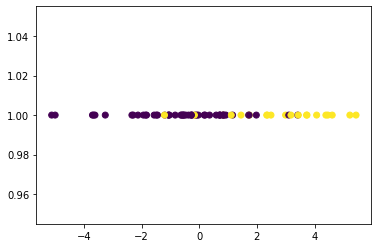

In [63]:
import matplotlib.pyplot as plt
import numpy as np

mus = np.array([-1.2, 2.3])
sigma2 = 2.0
pi_ = 0.70 # p(C_1)

n_data = 70
y = np.random.choice([0,1], size=n_data, p=[pi_, 1-pi_])
x = sigma2 * np.random.randn(n_data) + mus[y]

fig, ax = plt.subplots()
ax.scatter(x, np.ones_like(x), c=y)
plt.show()


Maximum likelihood estimation

In [68]:
pi_est = sum(y==0) / len(y)

In [64]:
n = np.array([sum(y==0), sum(y==1)])
mu_est = np.array([
    sum((1-y) * x) / n[0],
    sum((y) * x) / n[1],
])
mu_est

array([-0.62720722,  2.81074628])

In [65]:
s = np.zeros(2)
for i in range(2):
    res = x[y==i] - mus[i]
    s[i] = res @ res / n[i]

In [66]:
import scipy.stats

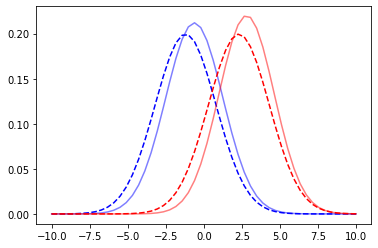

In [67]:
fig, ax = plt.subplots()

xp = np.linspace(-10,10,50)


ax.plot(xp, scipy.stats.norm.pdf(xp, loc=mus[0], scale=sigma2), color='b', ls='--')
ax.plot(xp, scipy.stats.norm.pdf(xp, loc=mu_est[0], scale=np.sqrt(s[0])), color='b', ls='-', alpha=0.5)
ax.plot(xp, scipy.stats.norm.pdf(xp, loc=mus[1], scale=sigma2), color='r', ls='--')
ax.plot(xp, scipy.stats.norm.pdf(xp, loc=mu_est[1], scale=np.sqrt(s[1])), color='r', ls='-', alpha=0.5)

plt.show()

How can we use these estimates?

Given a new input $x$, we can obtain the 

\begin{align}
    p\left(C_k\middle| x\right) & \propto p\left(x \middle| C_k\right) p\left(C_k\right) \\
        & = \mathcal{N}\left(x; \mu_k, \sigma^2_k\right) \pi_k
\end{align}

In [72]:
x_new = 1.30
p_ck = np.zeros(2)
p_ck[0] = scipy.stats.norm.pdf(x_new, loc=mu_est[0], scale=np.sqrt(s[0])) * pi_est
p_ck[1] = scipy.stats.norm.pdf(x_new, loc=mu_est[1], scale=np.sqrt(s[1])) * (1-pi_est)
p_ck /= p_ck.sum()

In [81]:
n_pts = 500
x_prob = np.linspace(-5,5, n_pts)
p_ck = np.zeros((n_pts, 2))
for i in range(n_pts):
    p_ck[i,0] = scipy.stats.norm.pdf(x_prob[i], loc=mu_est[0], scale=np.sqrt(s[0])) * pi_est
    p_ck[i,1] = scipy.stats.norm.pdf(x_prob[i], loc=mu_est[1], scale=np.sqrt(s[1])) * (1-pi_est)
    p_ck[i,:] /= p_ck[i,:].sum()

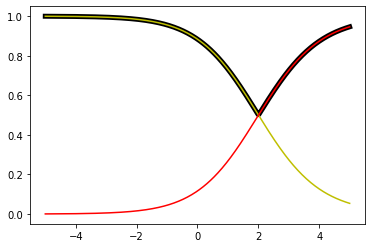

In [95]:
fig, ax = plt.subplots()

ax.plot(x_prob, np.max(p_ck, axis=1), c='k', lw=5, label="max prob")
ax.plot(x_prob, p_ck[:,0], label='p(C_1|x)', c='y')
ax.plot(x_prob, p_ck[:,1], label='p(C_2|x)', c='r')
plt.show()

In [86]:
np.max(p_ck, axis=1)

array([0.9994269 , 0.99941364, 0.99940008, 0.99938621, 0.99937202,
       0.99935751, 0.99934267, 0.9993275 , 0.99931198, 0.99929611,
       0.99927988, 0.99926328, 0.99924631, 0.99922896, 0.99921121,
       0.99919306, 0.9991745 , 0.99915552, 0.99913611, 0.99911626,
       0.99909597, 0.99907522, 0.999054  , 0.99903231, 0.99901012,
       0.99898744, 0.99896425, 0.99894053, 0.99891629, 0.99889149,
       0.99886614, 0.99884023, 0.99881373, 0.99878664, 0.99875894,
       0.99873062, 0.99870166, 0.99867206, 0.9986418 , 0.99861086,
       0.99857922, 0.99854688, 0.99851382, 0.99848003, 0.99844547,
       0.99841015, 0.99837404, 0.99833713, 0.9982994 , 0.99826082,
       0.99822139, 0.99818108, 0.99813988, 0.99809776, 0.99805471,
       0.9980107 , 0.99796572, 0.99791973, 0.99787274, 0.9978247 ,
       0.99777559, 0.9977254 , 0.99767411, 0.99762168, 0.99756809,
       0.99751332, 0.99745734, 0.99740013, 0.99734165, 0.99728189,
       0.99722081, 0.99715839, 0.9970946 , 0.99702941, 0.99696